# Visualize Mnist Dataset

In [33]:
import torch
import torchvision
import matplotlib.pyplot as plt


## Function to load and plot MNIST dataset

In [ ]:
def plot_mnist_images():
    # load dataset
    transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
    mnist_dataset = torchvision.datasets.MNIST(root='data', train=True, transform=transform, download=True)

    # Create a data loader to iterate through the dataset
    data_loader = torch.utils.data.DataLoader(mnist_dataset, batch_size=10, shuffle=True)

    for image, labels in data_loader:
        for i in range(10):
            plt.subplot(2, 5, i + 1)
            plt.imshow(image[i].squeeze().numpy(), cmap='gray')
            plt.title(f'Label: {labels[i]}')
            plt.axis('off')
        plt.show()
        break
    

if __name__ == '__main__':
    plot_mnist_images()

TypeError: subplot() takes 1 or 3 positional arguments but 2 were given

# Using Softmax 

In [35]:
import torch
import torch.nn as nn 
import torchvision
import torchvision.transforms as transforms


In [ ]:
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = torchvision.datasets.MNIST(root= 'data', train=True, transform=transform, download=False)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100,shuffle=True)
test_dataset = torchvision.datasets.MNIST(root='data', train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

print(train_dataset)
print(test_dataset)

AttributeError: module 'torchvision.transforms' has no attribute 'compose'

In [56]:
input_dim = 28*28
output_dim = 10

model = nn.Sequential(nn.Flatten(),
                      nn.Linear(input_dim, output_dim))

critetion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

epoch_max = 5
losses =[]

for epoch in range(epoch_max):
    for i, (images, labels) in enumerate(train_loader):
        outputs = model(images)
        loss = critetion(outputs, labels)
        losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{epoch_max}], Loss: {loss.item():.4f}')



Epoch [1/5], Loss: 0.3255
Epoch [2/5], Loss: 0.3044
Epoch [3/5], Loss: 0.3266
Epoch [4/5], Loss: 0.3747
Epoch [5/5], Loss: 0.2846


In [64]:
# test
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        predict = torch.argmax(outputs.data, dim = 1)
        total += labels.size(0)
        correct += (predict == labels).sum().item()
    print(f'Accuracy on 10,000 test images: {100 * correct / total:.2f}%')

Accuracy on 10,000 test images: 91.85%


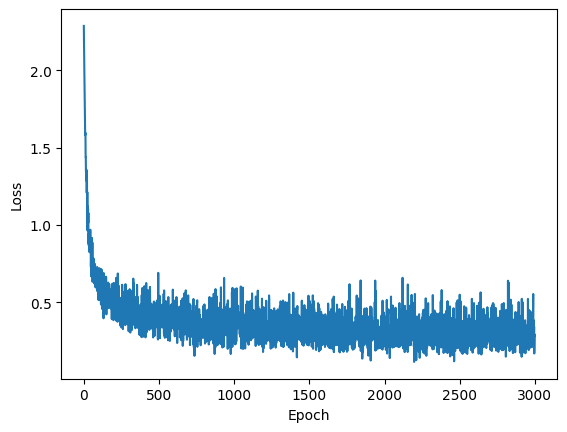

In [65]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()